# Diabetes Prediction using decsion tree, SVC, Naive Bayes

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reding file
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

WE can see that in few columns like Glucose, BloodPressure, Skin thickness, Insulin, BMI have min value as 0. Which is not possible as these features in reality have some min value. To yhandle this problem we will replace all 0 values with the mean value.

In [5]:
# replacing 0 with mean values
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

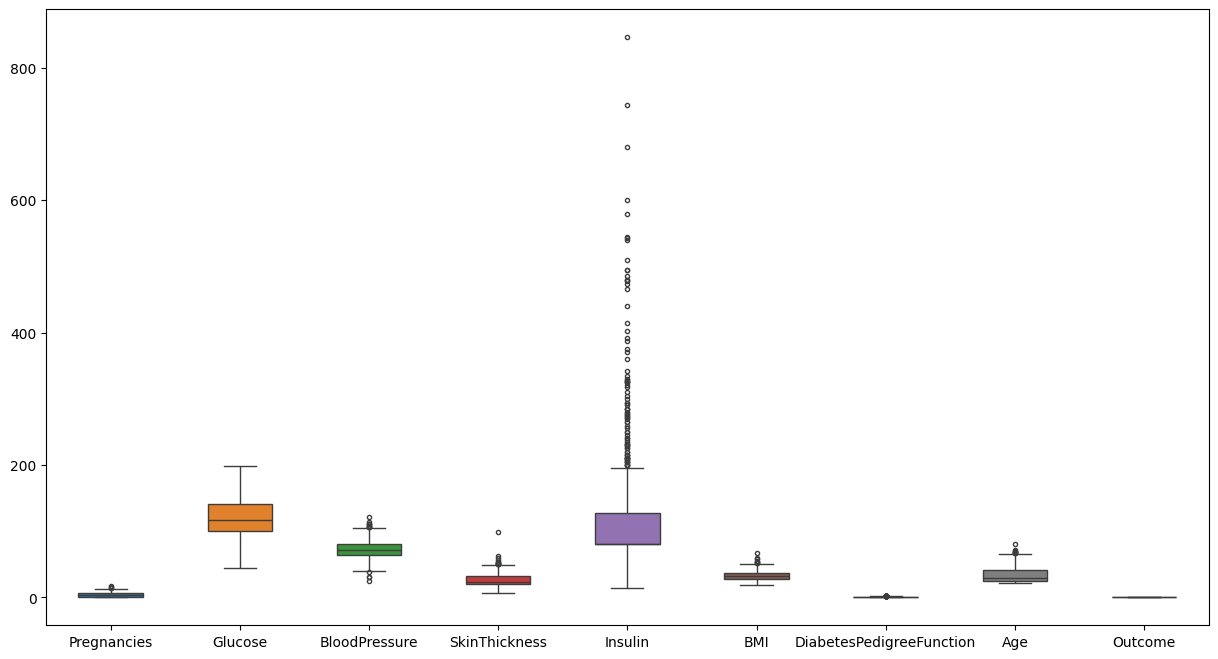

In [7]:
# now we dealt with 0's and now data looks better but there are still outliers, lets visualize it.
plt.subplots(figsize=(15,8))
sns.boxplot(data=df, width=0.5, fliersize=3)

In [8]:
# seggregate dependent and independent variables
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.23, random_state=0)
X_train.shape, X_test.shape


((591, 8), (177, 8))

In [10]:
import pickle
# standard scaling 
def std_scaler(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # saving the model 
    file = open('D:\Devanshi\DATA Science\ML Algorithms\std_scaler.pkl','wb')
    pickle.dump(scaler, file)
    file.close()

    return X_train_scaled, X_test_scaled

<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Mahakaal\AppData\Local\Temp\ipykernel_12632\2674198130.py:9: SyntaxWarning: invalid escape sequence '\D'
  file = open('D:\Devanshi\DATA Science\ML Algorithms\std_scaler.pkl','wb')


In [11]:
X_train_scaled, X_test_scaled = std_scaler(X_train, X_test)
X_train_scaled, X_test_scaled

(array([[ 0.33976395, -1.48618858,  0.78108088, ...,  0.45462968,
         -0.93249133,  0.12442909],
        [ 0.04705186, -0.39107003,  0.27752034, ..., -0.60773439,
         -1.0454392 , -0.54561732],
        [-0.83108443, -1.02159283, -0.72960074, ..., -0.49288422,
         -0.82548809, -1.04815213],
        ...,
        [ 0.04705186, -0.9220366 , -0.64567398, ..., -1.13891643,
         -0.95626983, -1.04815213],
        [ 2.09603652, -1.22070529,  0.10966682, ..., -0.36367778,
         -0.50447835,  0.12442909],
        [ 0.33976395,  0.47175065,  0.78108088, ..., -0.09197413,
          0.50610784,  2.97212635]]),
 array([[-0.83108443,  2.56243152,  0.27752034, ...,  1.47392494,
          2.74723136, -0.96439633],
        [-0.53837233, -0.49062626,  0.10966682, ...,  0.13879171,
         -0.19535787, -0.88064053],
        [ 0.04705186, -1.51937399, -0.89745425, ...,  0.1962168 ,
         -0.23399793, -0.71312892],
        ...,
        [-0.24566024,  0.67086312,  0.61322736, ..., -

In [12]:
# Decison tree Model Training with hyperparamnmter tuning
import warnings 
warnings.filterwarnings('ignore')

In [13]:
parameter = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [14]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()

In [15]:
clf=GridSearchCV(classifier, param_grid=parameter, cv=5, scoring='accuracy', verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [16]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [17]:
classifier = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 3,
 max_features='log2',
 splitter= 'best')

In [18]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

In [19]:
y_pred = classifier.predict(X_test_scaled)

In [20]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[122,   0],
       [ 55,   0]], dtype=int64)

In [21]:
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]

In [22]:
Accuracy = (TP+TN)/(TP+FP+FN+TN)
Accuracy

0.6892655367231638

In [23]:
Precision = TP/(TP+FP)
Precision

1.0

In [24]:
Recall = TP/(TP+FN)
Recall

0.6892655367231638

In [25]:
F1_Score = 2*(Recall*Precision)/(Recall+Precision)
F1_Score

0.8160535117056855

In [26]:
import pickle
file = open('D:\Devanshi\DATA Science\ML Algorithms\Diabetes prediction.pkl','wb')
pickle.dump(classifier, file)
file.close()

# support vector classifier with hyperparamter tuning

In [27]:
 # defining paramters 
param_grid ={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear','rbf','polynomial']
}

In [28]:
from sklearn.model_selection import GridSearchCV
svc = SVC()

In [29]:
grid=GridSearchCV(svc, param_grid=param_grid, cv=3, scoring='accuracy',refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.772 total time=   0.5s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.782 total time=   0.4s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.736 total time=   0.1s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.640 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.640 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.640 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.772 total time=   0.3s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.782 total time=   0.4s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear

In [ ]:
grid.best_params_

In [ ]:
svc_clf = SVC(c=0.1, gamma=1, kernel='linear')
svc_clf.fit(X_train,y_train)

In [ ]:
# svc prediction'
y_pred_svc = svc_clf.predict(X_test_scaled)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_svc)
conf_mat

In [ ]:
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]

In [ ]:
Accuracy = (TP+TN)/(TP+FP+FN+TN)
Accuracy

In [ ]:
Precision = TP/(TP+FP)
Precision

In [ ]:
Recall = TP/(TP+FN)
Recall

In [ ]:
F1_Score = 2*(Recall*Precision)/(Recall+Precision)
F1_Score

# Naive Bayes with Hyprerparamter tuning

In [27]:
from sklearn.naive_bayes import GaussianNB
bnb=BernoulliNB()

In [28]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [29]:
y_pred_nb = bnb.predict(X_test_scaled)
y_pred_nb

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [33]:
print(confusion_matrix(y_test,y_pred_nb))
print(accuracy_score(y_test,y_pred_nb))

[[  2 120]
 [ 10  45]]
0.2655367231638418


In [34]:
conf_mat = confusion_matrix(y_test, y_pred_nb)
conf_mat

array([[  2, 120],
       [ 10,  45]], dtype=int64)

In [35]:
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]

In [36]:
Accuracy = (TP+TN)/(TP+FP+FN+TN)
Accuracy

0.2655367231638418

In [37]:
Precision = TP/(TP+FP)
Precision

0.01639344262295082

In [38]:
Recall = TP/(TP+FN)
Recall

0.16666666666666666

In [39]:
F1_Score = 2*(Recall*Precision)/(Recall+Precision)
F1_Score

0.02985074626865672